In [1]:
import numpy as np
import pandas as pd

In [2]:
datawith = pd.read_csv('CleanTrainData.csv')
datawith.loc[datawith['Married']=="Yes",'Married']=1
datawith.loc[datawith['Married']=='No','Married']=0
datawith.loc[datawith['Education']=="Graduate",'Education']=1
datawith.loc[datawith['Education']=='Not Graduate','Education']=0
datawith.loc[datawith['Self_Employed']=="Yes",'Self_Employed']=1
datawith.loc[datawith['Self_Employed']=='No','Self_Employed']=0
datawith.loc[datawith['Property_Area']=="Urban",'Property_Area']=0
datawith.loc[datawith['Property_Area']=='Semiurban','Property_Area']=1
datawith.loc[datawith['Property_Area']=='Rural', 'Property_Area']=2
datawith = datawith.drop('Unnamed: 0', axis=1)
datawith.to_csv('cleandataformodel.csv')
datawith.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,0,1
1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,2,0
2,1,0,1,1,3000,0.0,66.000000,360.0,1.0,0,1
3,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,0,1
4,0,0,1,0,6000,0.0,141.000000,360.0,1.0,0,1


In [3]:
X1 = datawith.drop("Loan_Status", axis=1)
y1 = datawith["Loan_Status"]
print(X1.shape, y1.shape)

(614, 10) (614,)


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.utils import to_categorical

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=1, stratify=y1)
X1_scaler = StandardScaler().fit(X1_train)
X1_train_scaled = X1_scaler.transform(X1_train)
X1_test_scaled = X1_scaler.transform(X1_test)


# Step 1: Label-encode data set
label1_encoder = LabelEncoder()
label1_encoder.fit(y1_train)
encoded_y1_train = label1_encoder.transform(y1_train)
encoded_y1_test = label1_encoder.transform(y1_test)

# Step 2: Convert encoded labels to one-hot-encoding
y1_train_categorical = to_categorical(encoded_y1_train)
y1_test_categorical = to_categorical(encoded_y1_test)

Using TensorFlow backend.


In [5]:
from keras.models import Sequential
from keras.layers import Dense

model1 = Sequential()
model1.add(Dense(units=40, activation='relu', input_dim=10))
model1.add(Dense(units=40, activation='relu'))
model1.add(Dense(units=2, activation='softmax'))

Train on 460 samples, validate on 154 samples
Epoch 1/200
 - 1s - loss: 0.6492 - acc: 0.6870 - val_loss: 0.6550 - val_acc: 0.6883
Epoch 2/200
 - 0s - loss: 0.6368 - acc: 0.6913 - val_loss: 0.6424 - val_acc: 0.6883
Epoch 3/200
 - 0s - loss: 0.6260 - acc: 0.6935 - val_loss: 0.6301 - val_acc: 0.6883
Epoch 4/200
 - 0s - loss: 0.6160 - acc: 0.6957 - val_loss: 0.6204 - val_acc: 0.7013
Epoch 5/200
 - 0s - loss: 0.6071 - acc: 0.7043 - val_loss: 0.6104 - val_acc: 0.7143
Epoch 6/200
 - 0s - loss: 0.5981 - acc: 0.7196 - val_loss: 0.6004 - val_acc: 0.7143
Epoch 7/200
 - 0s - loss: 0.5895 - acc: 0.7283 - val_loss: 0.5903 - val_acc: 0.7273
Epoch 8/200
 - 0s - loss: 0.5809 - acc: 0.7326 - val_loss: 0.5818 - val_acc: 0.7532
Epoch 9/200
 - 0s - loss: 0.5729 - acc: 0.7391 - val_loss: 0.5732 - val_acc: 0.7597
Epoch 10/200
 - 0s - loss: 0.5657 - acc: 0.7413 - val_loss: 0.5652 - val_acc: 0.7662
Epoch 11/200
 - 0s - loss: 0.5584 - acc: 0.7587 - val_loss: 0.5577 - val_acc: 0.7662
Epoch 12/200
 - 0s - loss: 0

Epoch 97/200
 - 0s - loss: 0.4004 - acc: 0.8326 - val_loss: 0.4324 - val_acc: 0.8442
Epoch 98/200
 - 0s - loss: 0.3997 - acc: 0.8348 - val_loss: 0.4329 - val_acc: 0.8442
Epoch 99/200
 - 0s - loss: 0.3993 - acc: 0.8370 - val_loss: 0.4329 - val_acc: 0.8442
Epoch 100/200
 - 0s - loss: 0.3989 - acc: 0.8348 - val_loss: 0.4329 - val_acc: 0.8442
Epoch 101/200
 - 0s - loss: 0.3983 - acc: 0.8348 - val_loss: 0.4327 - val_acc: 0.8442
Epoch 102/200
 - 0s - loss: 0.3978 - acc: 0.8348 - val_loss: 0.4326 - val_acc: 0.8442
Epoch 103/200
 - 0s - loss: 0.3975 - acc: 0.8348 - val_loss: 0.4328 - val_acc: 0.8442
Epoch 104/200
 - 0s - loss: 0.3968 - acc: 0.8370 - val_loss: 0.4327 - val_acc: 0.8442
Epoch 105/200
 - 0s - loss: 0.3966 - acc: 0.8370 - val_loss: 0.4323 - val_acc: 0.8442
Epoch 106/200
 - 0s - loss: 0.3962 - acc: 0.8370 - val_loss: 0.4324 - val_acc: 0.8442
Epoch 107/200
 - 0s - loss: 0.3954 - acc: 0.8370 - val_loss: 0.4326 - val_acc: 0.8442
Epoch 108/200
 - 0s - loss: 0.3952 - acc: 0.8370 - val_lo

Epoch 193/200
 - 0s - loss: 0.3588 - acc: 0.8543 - val_loss: 0.4375 - val_acc: 0.8442
Epoch 194/200
 - 0s - loss: 0.3578 - acc: 0.8522 - val_loss: 0.4382 - val_acc: 0.8442
Epoch 195/200
 - 0s - loss: 0.3577 - acc: 0.8543 - val_loss: 0.4389 - val_acc: 0.8442
Epoch 196/200
 - 0s - loss: 0.3573 - acc: 0.8565 - val_loss: 0.4384 - val_acc: 0.8442
Epoch 197/200
 - 0s - loss: 0.3570 - acc: 0.8522 - val_loss: 0.4385 - val_acc: 0.8442
Epoch 198/200
 - 0s - loss: 0.3566 - acc: 0.8522 - val_loss: 0.4387 - val_acc: 0.8442
Epoch 199/200
 - 0s - loss: 0.3561 - acc: 0.8522 - val_loss: 0.4391 - val_acc: 0.8442
Epoch 200/200
 - 0s - loss: 0.3556 - acc: 0.8522 - val_loss: 0.4392 - val_acc: 0.8442
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


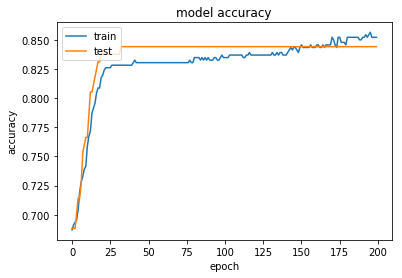

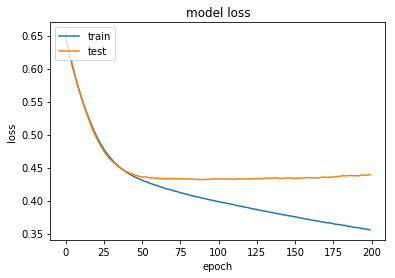

In [6]:
model1.compile(optimizer='SGD', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])
history = model1.fit(
    X1_train_scaled,
    y1_train_categorical,
    epochs=200,
    shuffle=True,
    verbose=2,validation_data=(X1_test_scaled,y1_test_categorical))
	
import matplotlib.pyplot as plt
model1.metrics_names
print(history.history.keys())
#  "Accuracy" plot
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
# 'loss' plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [7]:
model1_loss, model1_accuracy = model1.evaluate(X1_test_scaled, y1_test_categorical, verbose=2)
print(f"Normal Neural Network with data - Loss: {model1_loss}, Accuracy: {model1_accuracy}")


Normal Neural Network with data - Loss: 0.4391537517696232, Accuracy: 0.8441558457040167


In [8]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40)                440       
_________________________________________________________________
dense_2 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 82        
Total params: 2,162
Trainable params: 2,162
Non-trainable params: 0
_________________________________________________________________


In [9]:
predictions = model1.predict_classes(X1_test_scaled)
predictions

array([0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y1_test, predictions))

             precision    recall  f1-score   support

          0       1.00      0.50      0.67        48
          1       0.82      1.00      0.90       106

avg / total       0.87      0.84      0.83       154



In [11]:
from sklearn.externals import joblib
joblib.dump(X1_scaler, 'model_scaler.pkl') 


['model_scaler.pkl']

In [12]:
model1.save("mortgage_model_trained.h5")